In [8]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt

In [10]:
from neopgfs.environment import Environment

In [15]:
env = Environment(k=5, objective="hiv_int")

reactants.shape=(150560,), reactions.shape=(64,)
new reactions.shape=(113,)
Loaded 25 QSAR models


In [19]:
action = np.random.randn(10, 35)
print(action.shape)
env.get_k_neighbors(action).shape

(10, 35)


(10, 5)

RDKit ERROR: [21:32:13] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


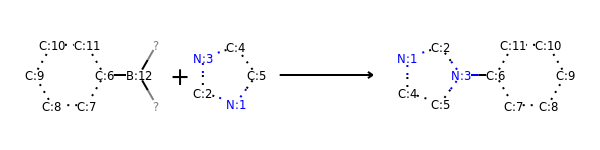

In [22]:
rxn = AllChem.ReactionFromSmarts(env.reactions[110])
rxn

In [24]:
r0 = None
r1 = None
for idx_reactant, smiles_mol in enumerate(env.reactants):
    mol = Chem.MolFromSmiles(smiles_mol)
    if r0 is None and mol.HasSubstructMatch(rxn.GetReactants()[0]):
        r0_idx = idx_reactant
        r0 = mol 
    elif r1 is None and mol.HasSubstructMatch(rxn.GetReactants()[1]):
        r1_idx = idx_reactant
        r1 = mol
    
    if r0 is not None and r1 is not None:
        break

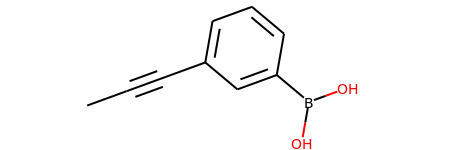

In [25]:
r0

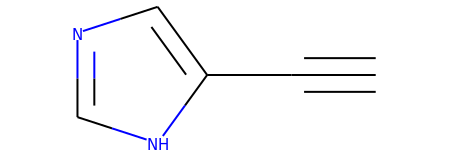

In [26]:
r1

In [27]:
env.reaction_predictor(110, Chem.MolToSmiles(r0), r1_idx)

'C#Cc1cn(-c2cccc(C#CC)c2)cn1'

In [34]:
rel_r0_rxns = np.load('/home/alfredo/work/rl/neopgfs/neopgfs/data/rel_reactant_reactions_r0.npy')
rel_r1_rxns = np.load('/home/alfredo/work/rl/neopgfs/neopgfs/data/rel_reactant_reactions_r1.npy')

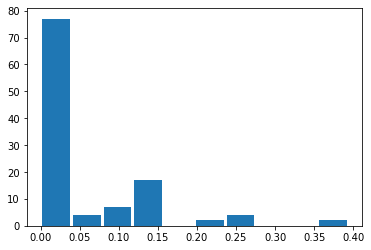

In [31]:
plt.hist(rel_r1_rxns.mean(axis=0), rwidth=0.9);

In [32]:
np.argmax(rel_r1_rxns.mean(axis=0))

97

In [4]:
Chem.MolFromSmiles(env.reactants[97])

NameError: name 'env' is not defined

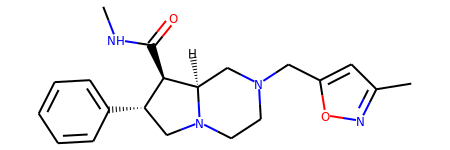

In [12]:
test_molecule = AllChem.MolFromSmiles("CNC(=O)[C@@H]1[C@@H](c2ccccc2)CN2CCN(Cc3cc(C)no3)C[C@H]12")
test_molecule

In [16]:
env.scoring_function("CCOC(=O)c1nc(Nc2ccc(OC)cc2)c2ccccc2n1")

5.234701518308217